### Score: `[102]`

Q1. `[4+10+10]` Good job! 第一题注意一下变量信息即可

Q2. `[11]` Very good job!

Q3. `[4+5.5+5.5+5.5+5.5 + 5.5+5+5+5+5]` Good job! 3.1注意数据格式

Q4. `[5+5+5.5]` Good job!

各题批注用`### Note`给出，请自行查阅。

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#使用sep='\t'，可以指定制表符为分隔符
Sig_Eqs = pd.read_csv('earthquakes-2024-10-29_10-37-56_+0800.tsv',sep='\t')

In [25]:
#1.1
#过滤出公元前2150年以来的数据
year_data = Sig_Eqs[Sig_Eqs['Year'] >= -2150]
#计算不同国家的死亡总数并分组
Sig_Eqs1 = year_data.groupby(['Country']).sum()['Deaths']
#将分组以降序排序并取前20个
Sig_Eqs1.sort_values(ascending = False).head(20)


### Note: 变量应选择Total_Deaths
'''
从数据界面可以看到数据标签的详细注释
Deaths: Whenever possible, numbers of deaths are listed.
Total Deaths: Whenever possible, total number of deaths from the earthquake and secondary effects are listed.
'''

Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64

<Axes: xlabel='Year'>

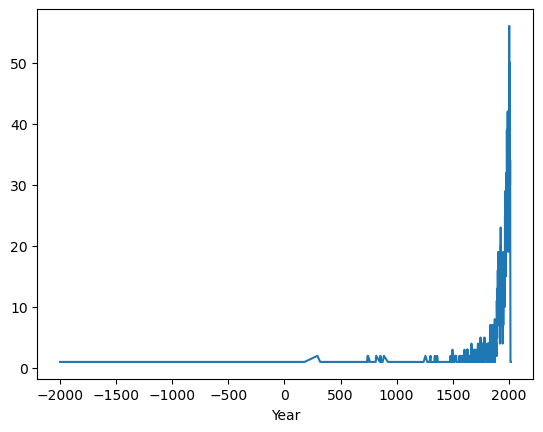

In [ ]:
#1.2
#I got a inspiration from Yi Yang,可以用作计数器,表示每一行（即每一次地震记录）都被视为一次事件。
Sig_Eqs['Number']=1
#将每年震级大于3的Number加起来
Sig_Eqs2 = Sig_Eqs.loc[Sig_Eqs['Ms']>3].groupby(['Year']).sum()['Number']
#画图
Sig_Eqs2.plot.line()
#观察到从公元1500年开始，地震频率越来越高，像指数型增长，有可能是全球进入了地震活跃期

### Note: 画图最好有坐标轴标题

In [63]:
#1.3
#本题向我的师姐龙师倩寻求了帮助
#检查输入的是否为DataFrame，并返回地震数量
def get_num_eq(largest_eq):
    if isinstance(largest_eq,pd.DataFrame):
        return len(largest_eq)
    else:
        return 0
        
def CountEq_LargestEq(country):
    country_data = Sig_Eqs[Sig_Eqs['Country'] == country]
    #如果有地震数量
    if len(country_data) > 0:
        #根据Ms降序排列，找出最大的地震
        largest_eq = country_data.sort_values('Ms', ascending = False)
        #获得地震的年份，月份与日期，拼接成字符串
        largest_da = f"{largest_eq.iloc[0]['Year']}-{largest_eq.iloc[0]['Mo']}-{largest_eq.iloc[0]['Dy']}"
        #获取地震发生的地方
        largest_lo = largest_eq.iloc[0]['Location Name']
    #如果没有地震，返回相关信息
    else:
        largest_eq = 'No earthquakes'
        largest_da = 'No earthquakes'
        largest_lo = 'No earthquakes'
    return largest_eq, largest_da, largest_lo   
#创建一个空列表储存每个国家的结果    
results = []
for country in Sig_Eqs['Country'].unique():
    #调用函数获取地震信息
    largest_eq, largest_da, largest_lo = CountEq_LargestEq(country)
    #获取地震数量
    num_eq = get_num_eq(largest_eq)
    #将各个元素添加到results列表中
    results.append((country, num_eq, largest_da, largest_lo))
#对地震数量进行排序(降序)
results.sort(key=lambda x: x[1], reverse=True)
#打印每个国家的地震信息
for country, num_eq, largest_da, largest_lo in results:
    print(f"Country:{country} Earthquakes:{num_eq} Date:{largest_da} Location:{largest_lo}")


Country:CHINA Earthquakes:623 Date:1920.0-12.0-16.0 Location:CHINA:  GANSU PROVINCE, SHANXI PROVINCE
Country:JAPAN Earthquakes:419 Date:869.0-7.0-13.0 Location:JAPAN:  SANRIKU
Country:INDONESIA Earthquakes:412 Date:2004.0-12.0-26.0 Location:INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST
Country:IRAN Earthquakes:386 Date:856.0-12.0-22.0 Location:IRAN:  DAMGHAN, QUMIS
Country:TURKEY Earthquakes:337 Date:1999.0-8.0-17.0 Location:TURKEY:  ISTANBUL, KOCAELI, SAKARYA
Country:ITALY Earthquakes:333 Date:1915.0-1.0-13.0 Location:ITALY:  MARSICA, AVEZZANO, ABRUZZI
Country:USA Earthquakes:278 Date:1957.0-3.0-9.0 Location:ALASKA
Country:GREECE Earthquakes:273 Date:1303.0-8.0-8.0 Location:GREECE:  CRETE
Country:PHILIPPINES Earthquakes:226 Date:1897.0-9.0-21.0 Location:PHILIPPINES:  MINDANAO, ZAMBOANGA, SULU, ISABELA
Country:MEXICO Earthquakes:212 Date:1787.0-3.0-28.0 Location:MEXICO:  SAN MARCOS, OAXACA
Country:CHILE Earthquakes:199 Date:1730.0-7.0-8.0 Location:CHILE:  VALPARAISO
Country:PERU Earthqua

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\2976577178.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Weather['DATE'] = pd.to_datetime(new_Weather['DATE'],errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\2976577178.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Weather['YEAR'] = new_Weather['DATE'].dt.year
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\2976577178.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

YEAR        1998       1999       2000       2001       2002       2003  \
MONTH                                                                     
1      15.233447  16.718875  16.379526  16.963957  16.112745  15.025641   
2      16.875304  18.562635  14.937097  16.874513  18.025229  18.463608   
3      19.971246  20.279426  19.911480  20.869220  21.417967  19.055263   
4      25.228365  24.900331  23.794485  22.842232  24.803134  24.231215   
5      27.098454  25.140681  26.779589  27.137987  27.257064  27.174689   
6      28.313107  29.326210  28.672650  27.594037  28.886527  27.617192   
7      29.564120  29.653387  29.250413  28.174542  28.799858  29.846122   
8      29.954622  28.780511  29.005964  29.087143  28.502216  28.970902   
9      28.089919  27.983466  27.882812  28.335639  27.030360  27.907604   
10     26.418671  26.268303  25.975580  25.943776  24.664663  24.982497   
11     22.900497  21.620893  20.447923  20.789146  20.443140  21.555899   
12     18.395948  15.6117

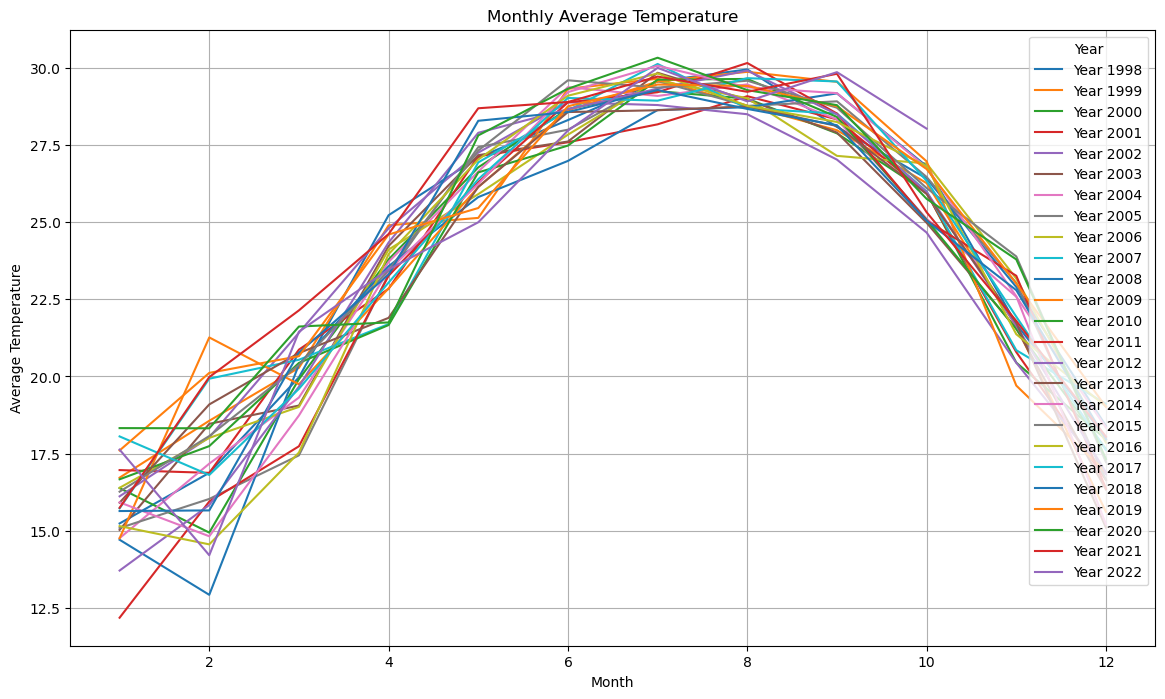

In [141]:
#2
#难点是读取文件时有错误，某些列包含混合数据类型,low_memory=False是为了减少混合类型的警告
Weather = pd.read_csv('Baoan_Weather_1998_2022.csv',low_memory = False)
#查看TMP数据发现为(+xxxx,x),我认为+xxxx为10倍的温度，逗号后面的是判断类型的ASCII字符
#首先我将TMP中的﹢号去除
Weather['TMP'] = Weather['TMP'].astype(str).str.replace('+','')
#将TMP分为Temperature和QO_CODE两部分
Weather[['Temperature', 'QC_CODE']] = Weather['TMP'].str.split(',', expand=True)
#转换温度为浮点数
Weather['Temperature'] = Weather['Temperature'].astype(float)
#转换 QC_CODE 为浮点数
Weather['QC_CODE'] = Weather['QC_CODE'].astype(float)
#算真实温度
Weather['Temperature'] = Weather['Temperature'] / 10
#筛选不要的值（即+999.9与ASCII中除了0,1,4,5的值）
new_Weather = Weather[(Weather['Temperature'] != 999.9) & (Weather['QC_CODE'].isin([0, 1, 4, 5]))]
#将日期转换成datetime
new_Weather['DATE'] = pd.to_datetime(new_Weather['DATE'],errors='coerce')
#提取年份
new_Weather['YEAR'] = new_Weather['DATE'].dt.year
#提取月份
new_Weather['MONTH'] = new_Weather['DATE'].dt.month
#按照年和月计算均值
mon_tmp = new_Weather.groupby(['YEAR','MONTH'])['Temperature'].mean(numeric_only=True).reset_index()
#创建透视表
draw_TMP = mon_tmp.pivot_table(index= 'MONTH', columns='YEAR', values='Temperature',aggfunc='mean')
#检验数据
print(draw_TMP)
#创建图形大小为14*8
plt.figure(figsize = (14,8))
#绘制每一年的每月平均温度数据，并为每条曲线添加标签
for year in draw_TMP.columns:
    plt.plot(draw_TMP.index, draw_TMP[year], label=f'Year {year}')
#设置图例
plt.legend(title='Year')

plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
#添加网格线
plt.grid(True)
plt.show()
#过去的25年中，夏天的平均气温差异较小，冬天的平均气温相差较大

In [143]:
pip install netCDF4


   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB 445.2 kB/s eta 0:00:16
   ---------------------------------------- 0.0/7.0 MB 281.8 kB/s eta 0:00:25
   ---------------------------------------- 0.1/7.0 MB 393.8 kB/s eta 0:00:18
    --------------------------------------- 0.1/7.0 MB 492.8 kB/s eta 0:00:14
    --------------------------------------- 0.1/7.0 MB 532.5 kB/s eta 0:00:13
   - -------------------------------------- 0.2/7.0 MB 726.5 kB/s eta 0:00:10
   - -------------------------------------- 0.3/7.0 MB 842.9 kB/s eta 0:00:08
   -- ------------------------------------- 0.4/7.0 MB 997.7 kB/s eta 0:00:07
   --- ------------------------------------ 0.5/7.0 MB 1.2 MB/s eta 0:00:06
   --- ------------------------------------ 0.7/7.0 MB 1.4 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.0 MB 1.8 MB/s eta 0:00:04
   ------

In [145]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [147]:
pip install nc-time-axis

Note: you may need to restart the kernel to use updated packages.


In [233]:
#3
#导入文件
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 #跳过文件中的第一行和第二行
                 skiprows=[1, 2], ### Note: 不需要跳过索引为2的行，索引为2的行也是数据
                 #将ISO_TIME解析成日期时间格式
                 parse_dates=['ISO_TIME'],
                 #将NOT_NAMED,NAME视为缺失值
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\1120637988.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


In [237]:
#3.1
#由于之前写的代码并没有将WMO_WIND转换成数值类型，所以在处理过程中无法将转换的值（如字符串）置为 NaN，在杨诣的指导下我做了修改
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')
#根据SID进行分组，并找到这个风暴的最大风速，将结果重置成DataFrame格式
WIND_STORM = df.groupby(['SID','NAME'])['WMO_WIND'].max().reset_index()
#按照最大风速进行降序排序，选择前10大风暴
largest_hurricanes = WIND_STORM.sort_values('WMO_WIND',ascending = False).head(10)
print(largest_hurricanes)

                SID      NAME  WMO_WIND
5027  2015293N13266  PATRICIA     185.0
2114  1980214N11330     ALLEN     165.0
2813  1988253N12306   GILBERT     160.0
4230  2005289N18282     WILMA     160.0
3603  1997253N12255     LINDA     160.0
5346  2019236N10314    DORIAN     160.0
4546  2009288N07267      RICK     155.0
5171  2017242N16333      IRMA     155.0
4220  2005261N21290      RITA     155.0
3688  1998295N12284     MITCH     155.0


                SID      NAME  WMO_WIND
5027  2015293N13266  PATRICIA     185.0
2114  1980214N11330     ALLEN     165.0
2813  1988253N12306   GILBERT     160.0
4230  2005289N18282     WILMA     160.0
3603  1997253N12255     LINDA     160.0
5346  2019236N10314    DORIAN     160.0
4546  2009288N07267      RICK     155.0
5171  2017242N16333      IRMA     155.0
4220  2005261N21290      RITA     155.0
3688  1998295N12284     MITCH     155.0
1860  1977242N27272     ANITA     150.0
5046  2016041S14170   WINSTON     150.0
1091  1969226N18280   CAMILLE     150.0
4354  2007225N12331      DEAN     150.0
4205  2005236N23285   KATRINA     150.0
3157  1992230N11325    ANDREW     150.0
407   1959249N19181     PATSY     150.0
3333  1994222N11267      JOHN     150.0
2042  1979238N12324     DAVID     150.0
283   1955265N13307     JANET     150.0


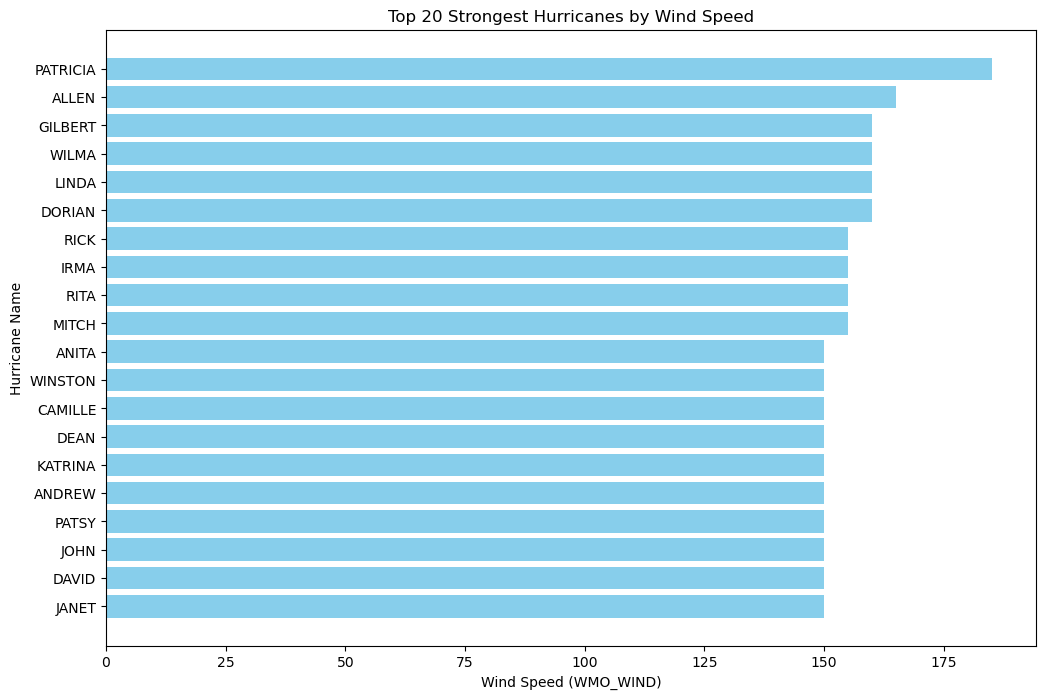

In [241]:
#3.2
large_20_hurricanes = WIND_STORM.sort_values('WMO_WIND',ascending = False).head(20)
print(large_20_hurricanes)
plt.figure(figsize=(12, 8))
plt.barh(large_20_hurricanes['NAME'], large_20_hurricanes['WMO_WIND'], color='skyblue')
plt.xlabel('Wind Speed (WMO_WIND)')
plt.ylabel('Hurricane Name')
plt.title('Top 20 Strongest Hurricanes by Wind Speed')
# 反转 Y 轴，使得风速最高的在最上面
plt.gca().invert_yaxis()  
plt.show()

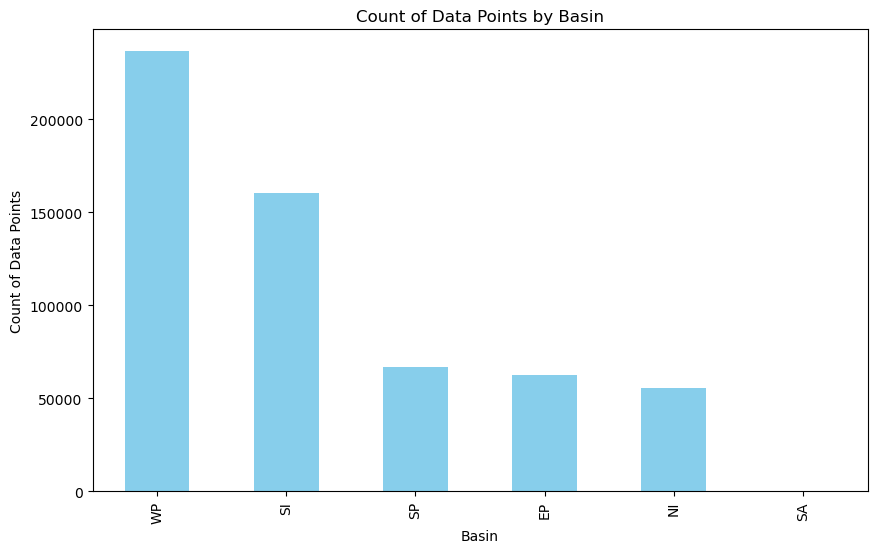

In [245]:
#3.3
#计算每个BASIN数据点的数量
basin_counts = df['BASIN'].value_counts()
#绘制条形图
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Basin')
plt.ylabel('Count of Data Points')
plt.title('Count of Data Points by Basin')
plt.show()

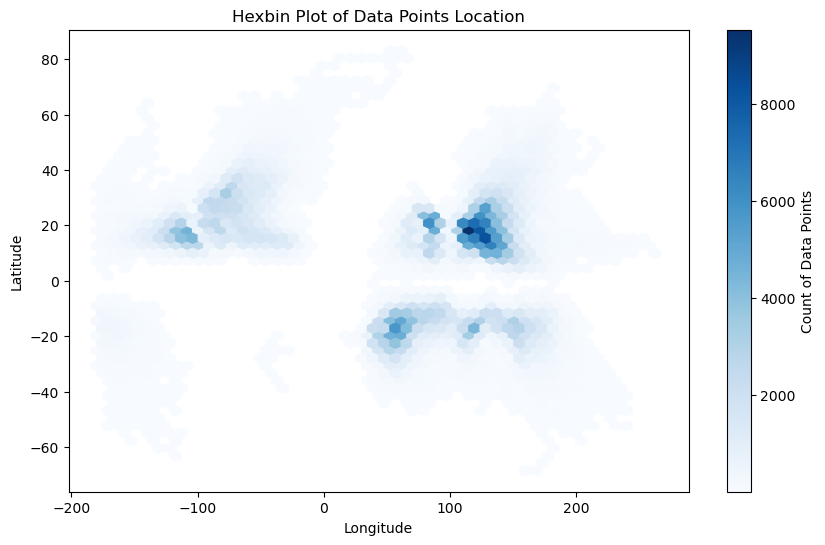

In [249]:
#3.4
plt.figure(figsize=(10, 6))
#绘制六边形图，mincnt=1是为了确保至少有一个数据点的六边形会被显示
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count of Data Points')  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points Location')
plt.show()

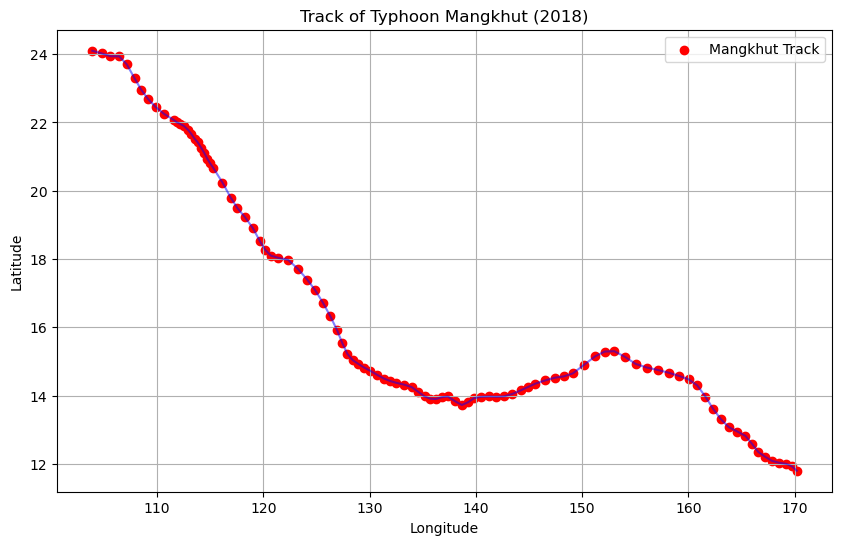

In [253]:
#3.5
#寻找名字为MANGKHUT，年份为2018年的数据
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['ISO_TIME'].dt.year == 2018)]
# 绘制散点图
plt.figure(figsize=(10, 6))
#绘制散点图
plt.scatter(mangkhut['LON'], mangkhut['LAT'], c='red', marker='o', label='Mangkhut Track')
#连接轨迹点
plt.plot(mangkhut['LON'], mangkhut['LAT'], linestyle='-', color='blue', alpha=0.5)
plt.title('Track of Typhoon Mangkhut (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#添加图例
plt.legend()
plt.grid()
plt.show()

In [261]:
#3.6
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & 
                 (df['BASIN'].isin(['WP', 'EP']))]
filtered_df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,,,PROVISIONAL,0,0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,,,PROVISIONAL,0,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,,,PROVISIONAL,1974,1952,P_____________


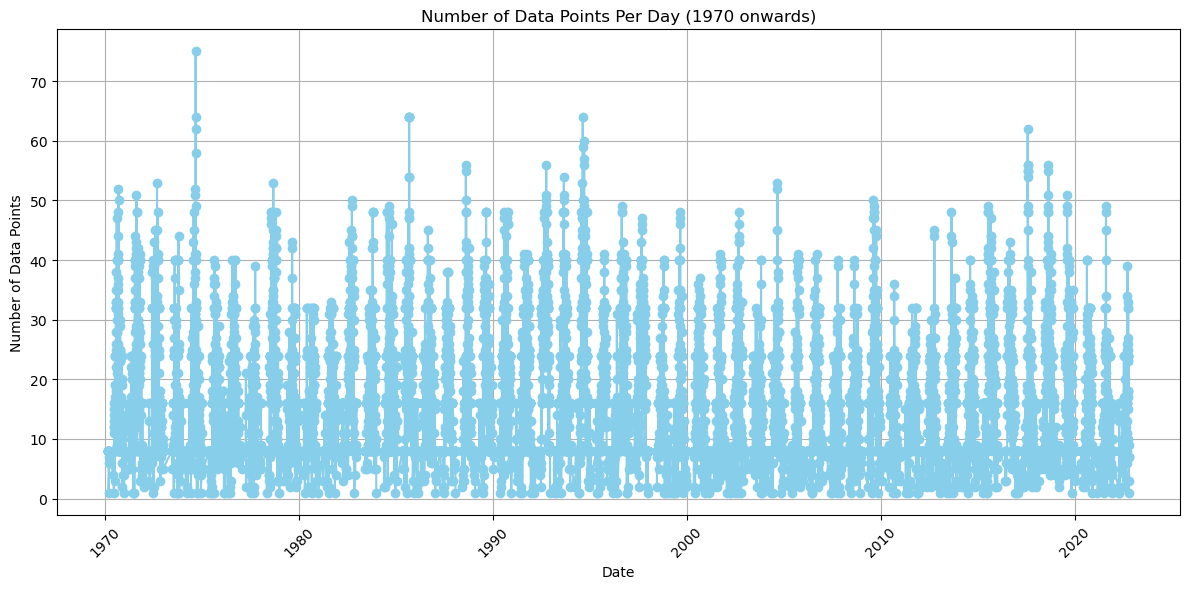

In [263]:
#3.7
#按日期计算数据点的数量
daily_counts = filtered_df['ISO_TIME'].dt.date.value_counts().sort_index()
# 绘制折线图（绘制柱状图的时候x轴标签重叠在一起了，因此使用折线图）
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='skyblue', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points Per Day (1970 onwards)')
# 旋转 x 轴标签以便于阅读
plt.xticks(rotation=45)  
plt.grid()
# 自动调整布局以避免标签重叠
plt.tight_layout()  
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\4235628547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_of_year'] = filtered_df['ISO_TIME'].dt.dayofyear


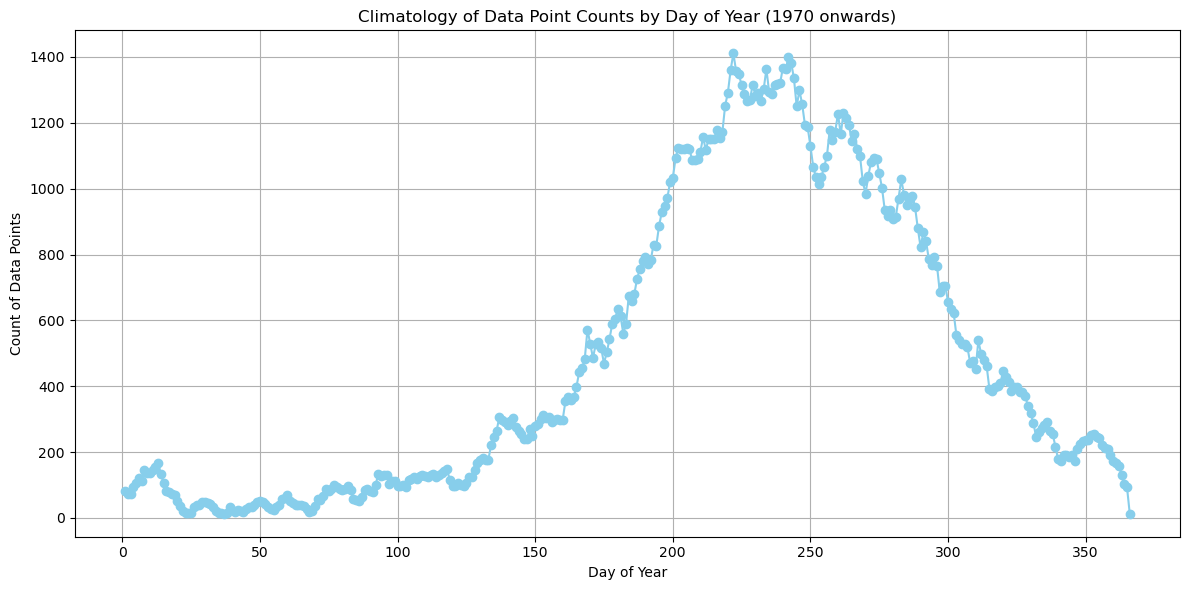

In [389]:
#3.8
#将时间转化成DOY
filtered_df['day_of_year'] = filtered_df['ISO_TIME'].dt.dayofyear

# 计算每一天的数据点数量
climatology_counts = filtered_df['day_of_year'].value_counts().sort_index()

# 绘制气候学图表
plt.figure(figsize=(12, 6))
climatology_counts.plot(kind='line', color='skyblue', marker='o')
plt.xlabel('Day of Year')
plt.ylabel('Count of Data Points')
plt.title('Climatology of Data Point Counts by Day of Year (1970 onwards)')
plt.grid()
plt.tight_layout()
plt.show()

     day_of_year  Actual_Count  Anomaly
0              1            83      NaN
1              2            72    -11.0
2              3            74      2.0
3              4            93     19.0
4              5           105     12.0
..           ...           ...      ...
361          362           158     -9.0
362          363           132    -26.0
363          364           104    -28.0
364          365            93    -11.0
365          366            13    -80.0

[366 rows x 3 columns]


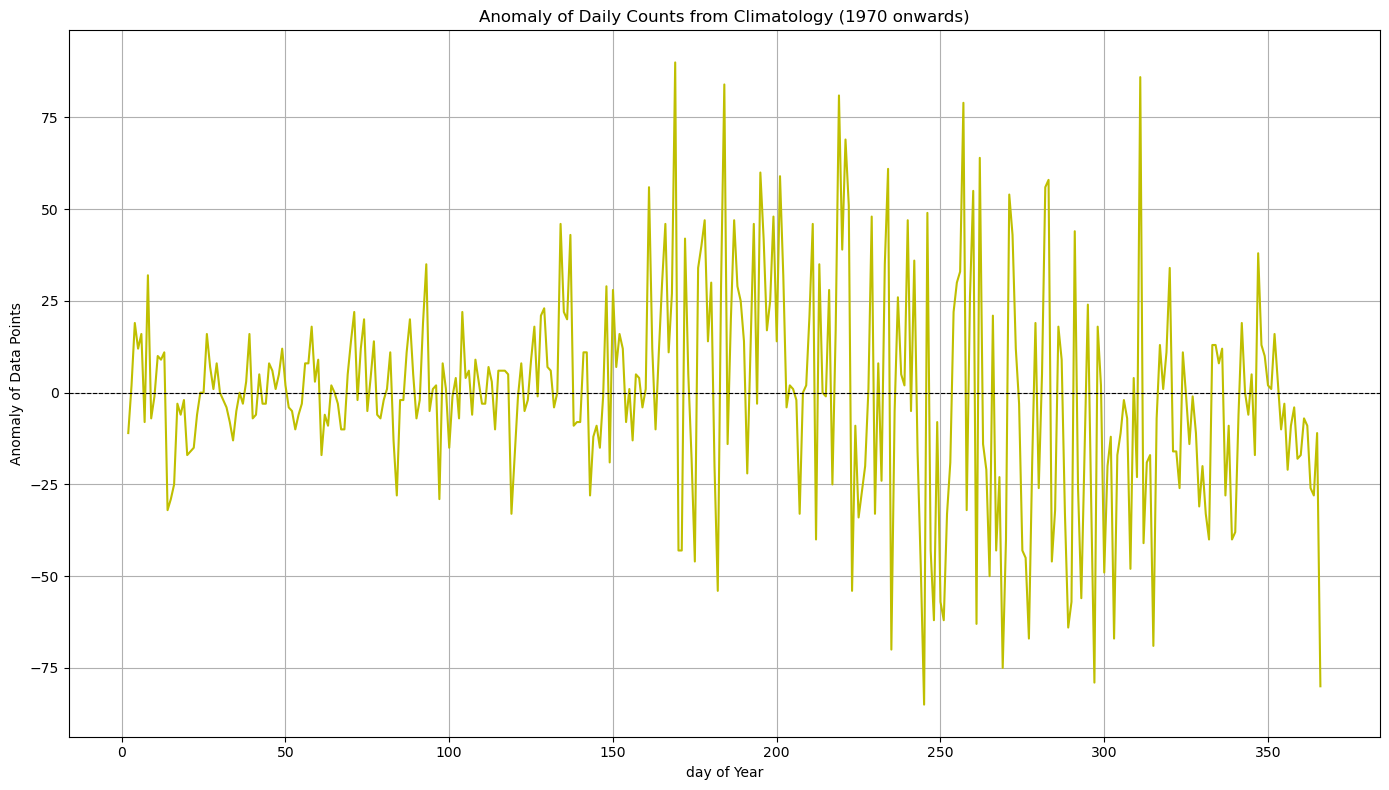

In [415]:
#3.9
#我从杨诣那里得到了灵感
#计算气候学平均值
climatology_mean = filtered_df.groupby('day_of_year').size().reset_index(name='Climatology_Count')
#计算实际计数
daily_counts = filtered_df.groupby('day_of_year').size().reset_index(name='Actual_Count')
#计算异常值
daily_counts['Anomaly']=daily_counts['Actual_Count']- climatology_mean.set_index('day_of_year')['Climatology_Count']
#显示结果
print(daily_counts)
plt.figure(figsize=(14, 8))
plt.plot(daily_counts['day_of_year'],daily_counts['Anomaly'],color='y')
#添加水平线表示平均值
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('day of Year')
plt.ylabel('Anomaly of Data Points')
plt.title('Anomaly of Daily Counts from Climatology (1970 onwards)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\1546102801.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_counts = daily_counts.resample('Y').mean()


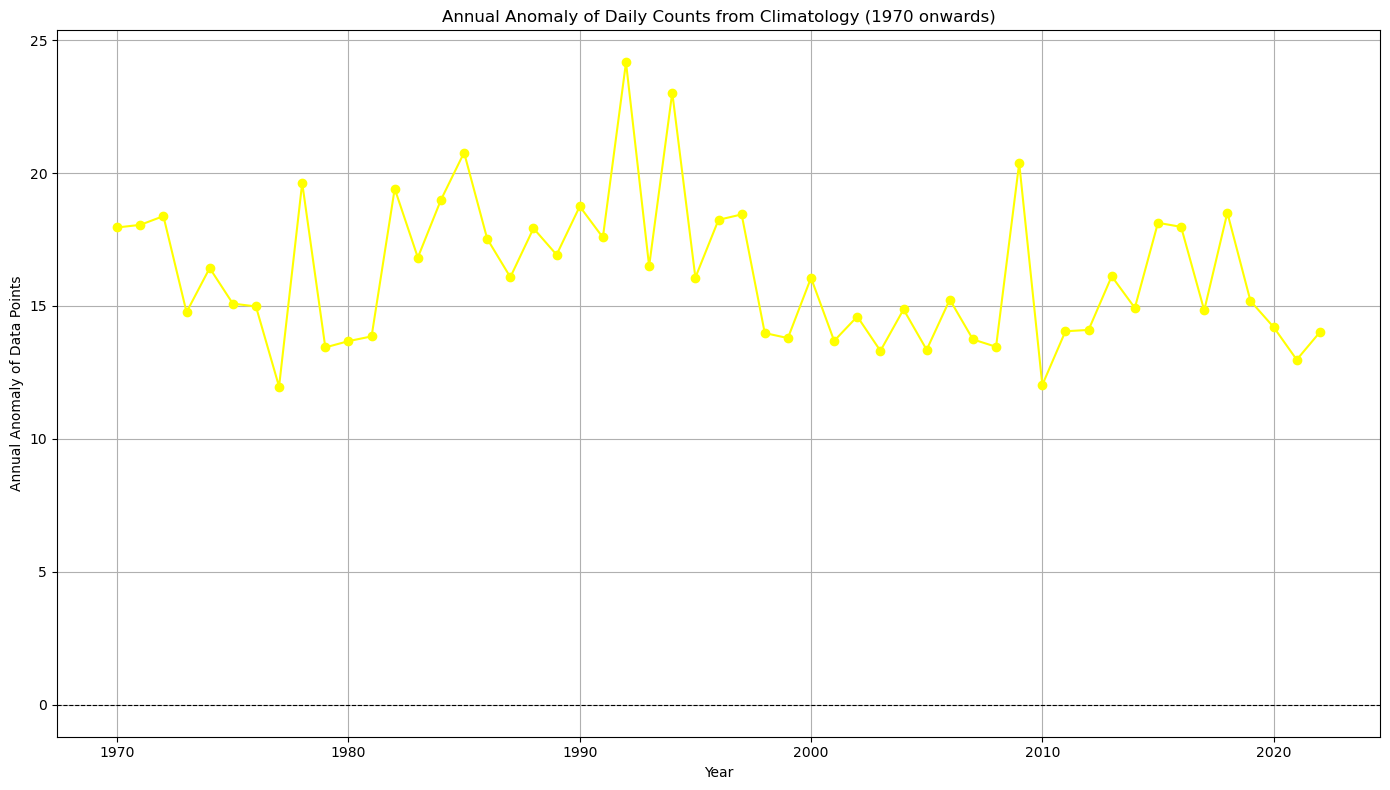

In [567]:
#3.10
# 将异常值设置为时间序列
daily_counts.index = pd.to_datetime(daily_counts.index)

# 以年分辨率进行重采样并计算均值
annual_counts = daily_counts.resample('Y').mean()

# 绘制年均异常值图表
plt.figure(figsize=(14, 8))
plt.plot(annual_counts.index.year, annual_counts, color='yellow', marker='o', linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # 添加水平线表示平均值
plt.xlabel('Year')
plt.ylabel('Annual Anomaly of Data Points')
plt.title('Annual Anomaly of Daily Counts from Climatology (1970 onwards)')
plt.grid(True)
plt.tight_layout()
plt.show()
#1985，1992,1994，2009年的飓风活动异常突出

In [555]:
#4.1 选择了布法罗尼亚加拉国际机场的信息进行导入
inf = pd.read_csv('72528014733.csv',low_memory = False)
inf.head()
#将+9999,9的值替换成NaN
inf = inf.replace(9999.9, np.nan)
#删除为全部NaN的列
inf=inf.dropna(axis=1,how="all")
#使用前一个非NaN值来填充NaN值，即进行向后填充
inf=inf.fillna(axis=0,method='bfill')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\4287247817.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  inf=inf.fillna(axis=0,method='bfill')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13880\1937861391.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = new_inf['temperature'].resample('M').mean()


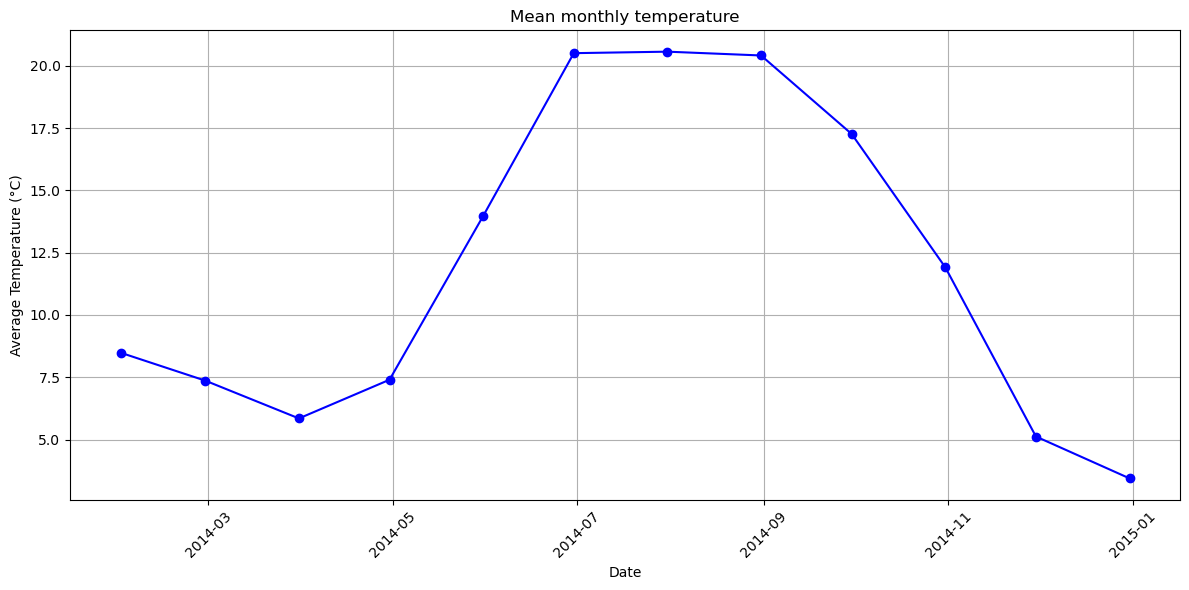

In [557]:
#4.2
inf['DATE'] = pd.to_datetime(inf['DATE'], errors='coerce')
inf.set_index('DATE', inplace=True)
inf['TMP'] = inf['TMP'].astype(str).str.replace('+','',regex=False).str.replace('-','',regex=False)
#print(inf['TMP'].head())
inf[['temperature','qc_code']] = inf['TMP'].str.split(',',expand=True)
inf['temperature'] = inf['temperature'].astype(float)
inf['qc_code'] = inf['qc_code'].astype(str)
inf['temperature'] = inf['temperature'] / 10
valid_qc_codes = ['0', '1', '4', '5']  # 合格的质量控制代码
new_inf = inf[inf['qc_code'].isin(valid_qc_codes)]
monthly_avg_temp = new_inf['temperature'].resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, marker='o', linestyle='-', color='blue')
plt.title('Mean monthly temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.tight_layout()
plt.show()

In [569]:
#4.3
#（1）对均值、中位数、标准差、最小值和最大值进行统计检查
summary_stats = new_inf['temperature'].describe()
print(summary_stats)
#平均温度相对较低

count    14374.000000
mean        11.471428
std          7.615531
min          0.000000
25%          4.400000
50%         11.000000
75%         17.800000
max         31.100000
Name: temperature, dtype: float64


In [571]:
#（2）对缺失值进行检查
missing_values = new_inf['temperature'].isnull().sum()
print(f'温度的缺失值数量: {missing_values}')

温度的缺失值数量: 0


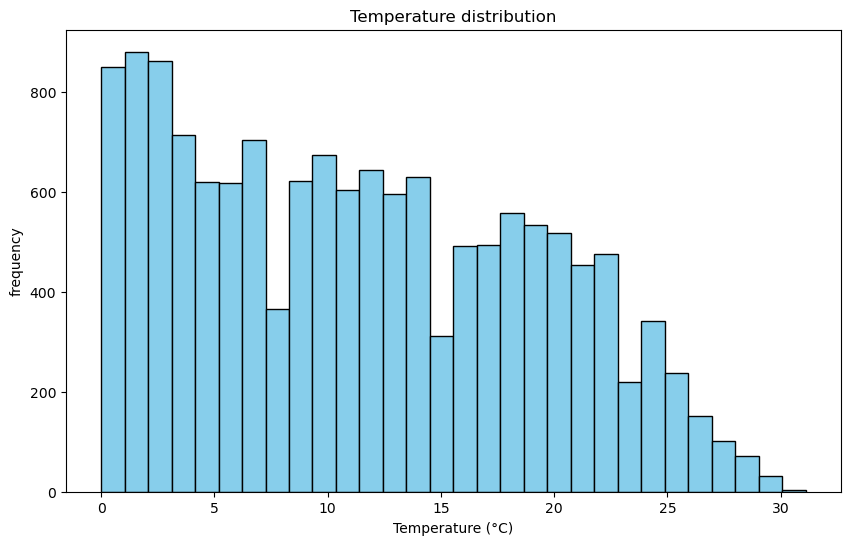

In [575]:
#（3）使用直方图检查温度值的分布
plt.figure(figsize=(10, 6))
new_inf['temperature'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('frequency')
plt.grid()
plt.show()
#温度在0-5区间的较多，高温较少

In [577]:
#(4)使用四分位数法识别潜在的异常值
Q1 = new_inf['temperature'].quantile(0.25)
Q3 = new_inf['temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = new_inf[(new_inf['temperature'] < lower_bound) | (new_inf['temperature'] > upper_bound)]
print(f'异常值数量: {len(outliers)}')

异常值数量: 0


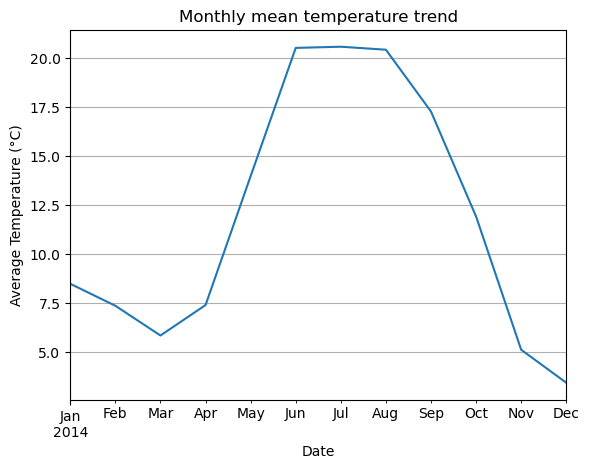

趋势斜率: 0.1241233345598398


In [579]:
#(5)平均月温度随时间的变化趋势
monthly_avg_temp.plot()
plt.title('Monthly mean temperature trend')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid()
plt.show()

# 计算趋势线的斜率
slope = np.polyfit(range(len(monthly_avg_temp)), monthly_avg_temp, 1)[0]
print(f'趋势斜率: {slope}')